In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [92]:
ef=pd.read_csv('/content/advertising_ef.csv')
ef.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0


In [93]:
ef.isnull().sum()

,0
Daily Time Spent on Site,4
Age,11
Area Income,11
Daily Internet Usage,4
City,11
Gender,0
Country,13
Clicked on Ad,0


In [94]:
num_cols = ef.select_dtypes(include=['number']).columns
cat_cols = ef.select_dtypes(include=['object']).columns
ef[num_cols] = ef[num_cols].fillna(ef[num_cols].median())
ef[cat_cols] = ef[cat_cols].fillna(ef[cat_cols].mode().iloc[0])

In [95]:
ef.isnull().sum().sum()

0

In [96]:
le = LabelEncoder()
ef['City'] = le.fit_transform(ef['City'])
ef['Country'] = le.fit_transform(ef['Country'])
ef['Gender'] = le.fit_transform(ef['Gender'])

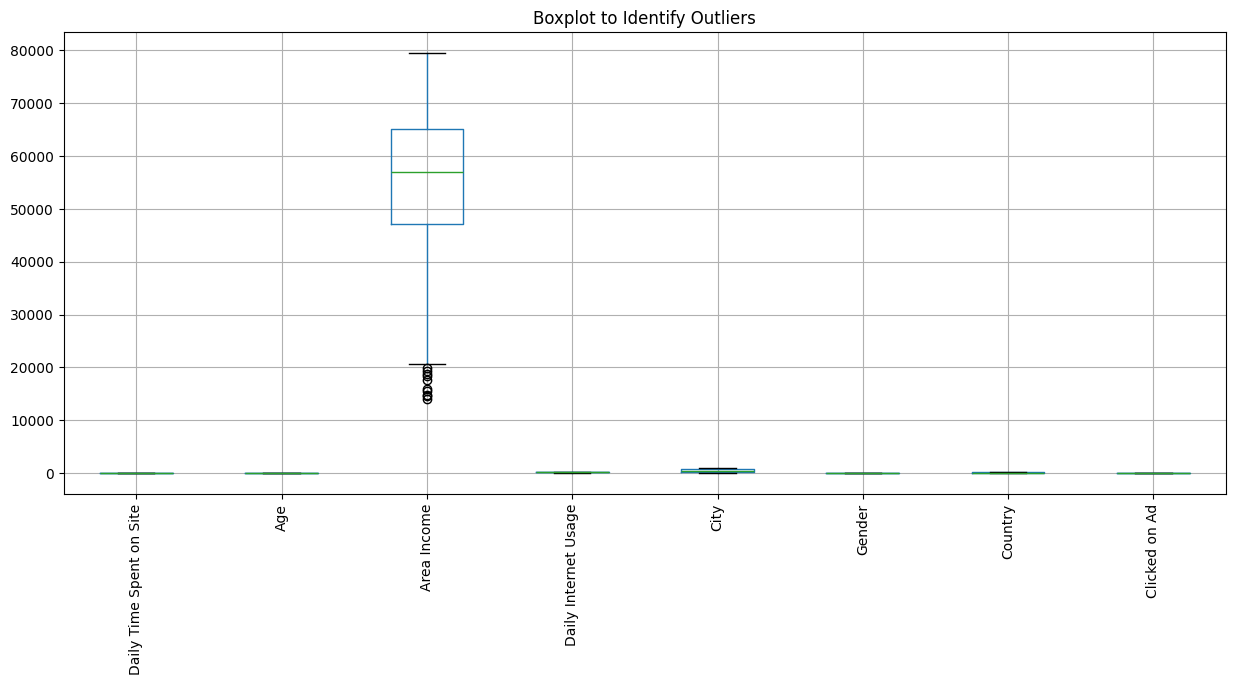

In [97]:
#outlier detection
plt.figure(figsize=(15, 6))
ef.boxplot(rot=90)
plt.title("Boxplot to Identify Outliers")
plt.show()

In [98]:
# Outlier handling using IQR method
Q1 = ef[num_cols].quantile(0.25)
Q3 = ef[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
ef[num_cols] = ef[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

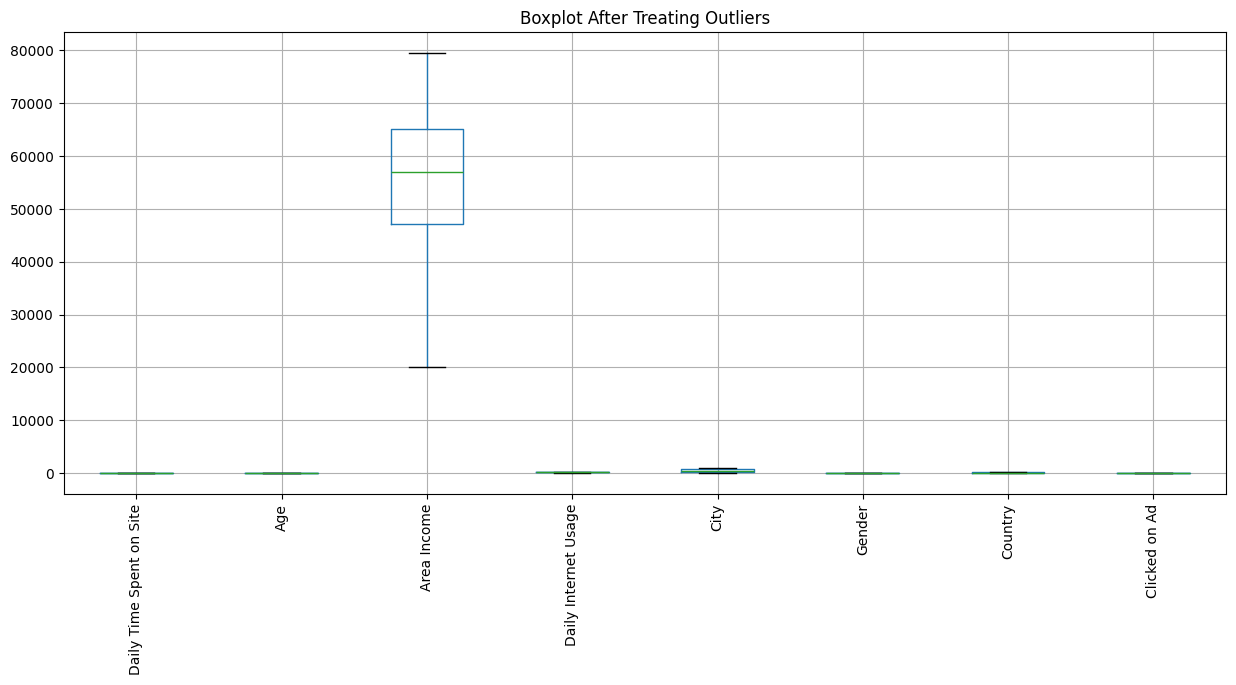

In [99]:
plt.figure(figsize=(15, 6))
ef.boxplot(rot=90)
plt.title("Boxplot After Treating Outliers")
plt.show()

In [100]:
X = ef[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Gender']]
y = ef['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# Convert to integer for Multinomial and Bernoulli models
X_train_int = np.round(X_train).astype(int)
X_test_int = np.round(X_test).astype(int)

In [117]:
# Gaussian Naïve Bayes
import seaborn as sns
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian NB Accuracy", accuracy_score(y_test, y_pred_gnb))
print("\nGaussian NB Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

Gaussian NB Accuracy 0.9554455445544554

Gaussian NB Confusion Matrix:
[[ 91   5]
 [  4 102]]


In [118]:
# Multinomial Naïve Bayes
mnb = MultinomialNB()
mnb.fit(X_train_int, y_train)
y_pred_mnb = mnb.predict(X_test_int)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Multinomial NB Accuracy", accuracy_score(y_test, y_pred_mnb))
print("\nMultinomial NB Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb))

Multinomial NB Accuracy 0.8415841584158416

Multinomial NB Confusion Matrix:
[[84 12]
 [20 86]]


In [119]:
# Bernoulli Naïve Bayes
bnb = BernoulliNB()
bnb.fit(X_train_int, y_train)
y_pred_bnb = bnb.predict(X_test_int)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print(f"Bernoulli NB Accuracy", accuracy_score(y_test, y_pred_bnb))
print("\nBernoulli NB Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))

Bernoulli NB Accuracy 0.5297029702970297

Bernoulli NB Confusion Matrix:
[[55 41]
 [54 52]]


In [120]:
print("\nGaussian NB Classification Report:")
print(classification_report(y_test, y_pred_gnb))
print("\nMultinomial NB Classification Report:")
print(classification_report(y_test, y_pred_mnb))
print("\nBernoulli NB Classification Report:")
print(classification_report(y_test, y_pred_bnb))


Gaussian NB Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        96
           1       0.95      0.96      0.96       106

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.96      0.96      0.96       202


Multinomial NB Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        96
           1       0.88      0.81      0.84       106

    accuracy                           0.84       202
   macro avg       0.84      0.84      0.84       202
weighted avg       0.84      0.84      0.84       202


Bernoulli NB Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.54        96
           1       0.56      0.49      0.52       106

    accuracy                           0.53       202
   macro avg    